# XOR Function

We want an NN to learn the XOR function

In [1]:
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X = np.array([[1.0, 1.0],
              [1.0, -1.0],
              [-1.0, 1.0],
              [-1.0, -1.0]])

y = np.array([1.,0.,0.,1.])

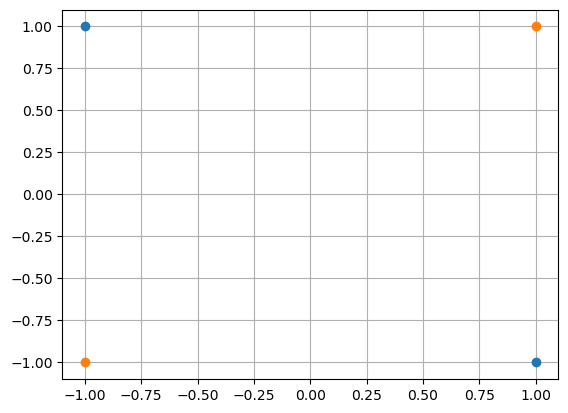

In [4]:
for k in range(2):
    members = y == k
    plt.plot(X[members, 0], X[members, 1], 'o')
plt.grid(True)

In [5]:
xt = torch.tensor(X, dtype=torch.float)
yt = torch.tensor(y, dtype=torch.float)
#xt[0], yt[0]
#yt

# Using NN

In [6]:
model = nn.Sequential(
                nn.Linear(2, 10),
                nn.ReLU(),
                nn.Linear(10,10),
                nn.ReLU(),
                nn.Linear(10,1),
                nn.Sigmoid())

In [7]:
model(torch.tensor([[1.0, 2.0]]))

tensor([[0.5025]], grad_fn=<SigmoidBackward0>)

In [8]:
y_pred_probs = torch.round(model(xt).squeeze())
y_pred_probs

tensor([0., 0., 0., 0.], grad_fn=<RoundBackward0>)

In [9]:
loss_fn = nn.BCEWithLogitsLoss()
# loss_fn(y_pred_probs, yt)

In [10]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [11]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [12]:
def training_loop(n_epochs, optimizer, model, loss_fn, xt, yt):
    for epoch in range(1, n_epochs + 1):
        y_logits = model(xt).squeeze()

        y_pred_probs = torch.round(y_logits)
        acc = accuracy_fn(y_pred_probs, yt)
        
        loss_train = loss_fn(y_logits, yt)
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f}, Accuracy {acc}")

In [13]:
training_loop(n_epochs = 5000, optimizer = optimizer, model = model, loss_fn = loss_fn, xt = xt, yt = yt)

Epoch 1, Training loss 0.7211, Accuracy 50.0
Epoch 1000, Training loss 0.6131, Accuracy 75.0
Epoch 2000, Training loss 0.5069, Accuracy 100.0
Epoch 3000, Training loss 0.5041, Accuracy 100.0
Epoch 4000, Training loss 0.5036, Accuracy 100.0
Epoch 5000, Training loss 0.5035, Accuracy 100.0


In [14]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.2634, -0.5890],
         [ 0.1450, -0.1053],
         [ 1.1355, -1.0217],
         [-0.5212, -0.6747],
         [-1.0608,  0.7874],
         [-0.4499, -0.7577],
         [ 0.9694, -0.7152],
         [-0.8831,  0.9037],
         [ 0.8795,  0.8795],
         [-0.4094, -0.5076]], requires_grad=True),
 Parameter containing:
 tensor([-5.3878e-01, -2.7457e-01,  1.1376e-01,  9.2924e-01,  5.5049e-01,
          3.0781e-01,  2.5412e-01,  2.0587e-02,  1.0679e-05, -6.8360e-01],
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.4048,  0.1742,  0.9306,  0.2154,  0.1146, -0.5405,  0.9118,  0.3449,
          -0.5436,  0.1368],
         [-0.2057,  0.2571,  0.3391, -0.2839,  0.1883,  0.1659,  0.0862,  0.2516,
          -0.1159,  0.2336],
         [-0.0743, -0.2224,  0.5206,  0.0302,  0.0107, -0.0393,  0.2524,  0.4893,
          -0.1924, -0.3511],
         [-0.0920,  0.2806,  0.1597,  0.1336,  0.2801,  0.0521,  0.2516,  0.2442,
          -0.1235, -0.1673

In [15]:
torch.round(model(xt).squeeze()) == yt

tensor([True, True, True, True])

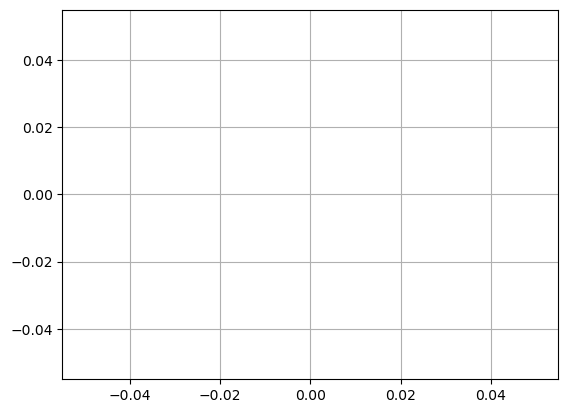

In [111]:
for k in range(len(centers)):
    members = y == k
    plt.plot(X[members, 0], X[members, 1], 'o')

members = torch.round(model(xt).squeeze()) != yt
plt.plot(X[members, 0], X[members, 1], 'kx', markersize=15)
plt.grid(True)

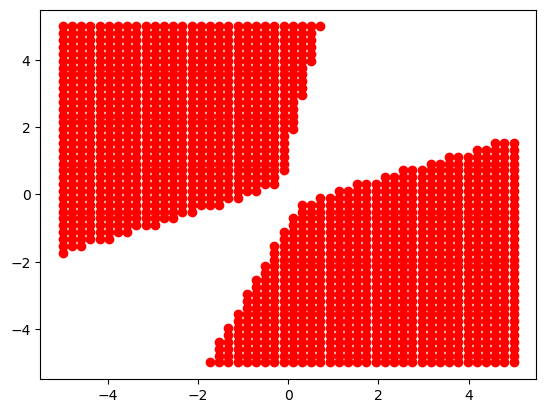

In [16]:
xs = np.linspace(-5., 5., num = 50, dtype=float)

for x in xs:
    for y in xs:
        pred = torch.round(model(torch.tensor([float(x), float(y)])).squeeze())
        d = pred == 0
        if(d):
            plt.plot(x,y,'ro')